# Introduction // Introducción

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

//

Este projecto analiza los datos de la aplicación de citas OKCupid. En los años recientes se ha incrementado masivamente el uso de aplicaciones de citas para encontrar el amor. Muchas de estas aplicaciones utilizan técnicas sofisticadas de ciencia de datos para recomendar posibles coincidencias en usuarios y para optimizar la experiencia del usuario. Estas aplicaciones nos dan acceso a valiosa información que nunca habíamos tenido antes sobre cómo diferentes personas experimentan el romance.

La meta de este proyecto es monitorear, preparar, analizar y crear un modelo de Machine Learning para resolver una pregunta.


**Data sources:** // **Fuente de datos:**

`profiles.csv` was provided by Codecademy.com. // `profiles.csv` fue proporcionada por Codecademy.com.

## Scoping // Alcance


### Project Goals // Metas del Proyecto

In this project, the goal is to utilize apply machine learning techniques to a data set. The first research question that will be answered is whether an OkCupid's user genre can be predicted using other variables from their profiles, like height, body type and habits. This part of the project will allow us to know if this habits are significantly different between women and men. The second research question is wheter an OkCupid's user income can be predicted using another variables like genre, education, actual job and sexual orientation. This will let us know how significance are these variables in this prediction. Finally, we will try to predict the astrological sign for OKCupid users. This is a valuable prediction since many users find astrological compatibility an important part of matches, and some OkCupid's users don't input their sign.

//

En este proyecto, el objetivo es aplicar técnicas de Machine Learning a un conjunto de datos. La primera pregunta de investigación que se responderá es si el género de usuario de un OkCupid se puede predecir utilizando otras variables de sus perfiles, como la altura, el tipo de cuerpo y los hábitos. Esta parte del proyecto nos permitirá saber si estos hábitos son significativamente diferentes entre mujeres y hombres. La segunda pregunta de investigación es si el ingreso de un usuario de OkCupid se puede predecir usando otras variables como género, educación, trabajo real y orientación sexual. Esto nos permitirá saber qué importancia tienen estas variables en esta predicción. Finalmente, intentaremos predecir el signo zodiacal para los usuarios de OKCupid. Esta es una predicción valiosa ya que muchos usuarios consideran que la compatibilidad astrológica es una parte importante de las coincidencias y algunos usuarios de OKCupid no ingresan su signo.

### Data // Datos

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

//

El proyecto tiene un conjunto de datos extraidos de Codecademy llamados `profiles.csv`. En los datos, cada fila representa un usuario de OkCupid y las columnas son las respuestas a su perfil de usuario las cuales incluyes respuestas cortas y de opciones multiples. 

### Analysis // Análisis

We will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's variables, classification algorithms from the supervised learning family of machine learning models will be implemented. 

//

Utilizaremos estadísticas descriptivas y visualización de datos para encontrar cifras clave para comprender la distribución, el recuento y la relación entre las variables. Dado que el objetivo del proyecto es realizar predicciones sobre las variables del usuario, se implementarán algoritmos de clasificación supervisados de Machine Learning.


### Evaluation // Evaluación

The project will conclude with the evaluation of the machine learning models selected with their respective validation data set. The output of the predictions will be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

//

El proyecto concluirá con la evaluación de los modelo de Machine Learning seleccionados con su respectivo conjunto de datos de validación. La salida de las predicciones se verificará a través de una matriz de confusión y métricas como exactitud, precisión, recuperación, puntuaciones F1 y Kappa.

## Import Python Modules //  Importar Módulos de Python

Principal modules being used for this project: // Módulos principales que se utilizan para este proyecto:

In [54]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [55]:
## ML library 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [76]:
##Imbalanced library
from imblearn.over_sampling import SMOTE

## Loading the Data // Cargando los Datos

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python. 

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined to check the contents.

//

Para analizar el perfil de los usuarios de OkCupid, se cargaran el conjunto de datos es un `DataFrame` utilizando pandas para explorarlo y visualizarlo en Python.

El archivo `profiles.csv` es cargado en un `DataFrame` llamado `profiles`. El `DataFrame` es exáminado brevemente para tener una idea de su contenido.

In [4]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### Data Characteristics // Características de los Datos

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. // `profiles` tiene 59,946 filas y 31 columnas, lo cual parece ser suficiente para utilizar técnicas de Machine Learning.

The columns in the dataset include: // Las columnas del conjunto de datos incluyen:

- **age:** continuous variable of age of user // Edad del usuario. Variable continua.
- **body_type:** categorical variable of body type of user // Tipo de cuerpo del usuario. Variable categórica.
- **diet:** categorical variable of dietary information // Dieta del usuario. Variable categórica.
- **drinks:**  categorical variable of alcohol consumption // Consumo de alcohol. Variable categórica.
- **drugs:** categorical variable of drug usage // Uso de drogas. Variable categórica.
- **education:** categorical variable of educational attainment // Nivel educativo. Variable categórica.
- **ethnicity:** categorical variable of ethnic backgrounds // Origen étnico. Variable categórica.
- **height:** continuous variable of height of user // Altura del usuario. Variable continua.
- **income:** continuous variable of income of user // Ingresos del usuario. Variable continua.
- **job:** categorical variable of employment description // Descripción del empleo. Variable categórica.
- **offspring:** categorical variable of children status // Cantidad de hijos. Variable categórica.
- **orientation:** categorical variable of sexual orientation // Orientación Sexual. Variable categórica.
- **pets:** categorical variable of pet preferences // Preferencia de Mascotas. Variable categórica.
- **religion:** categorical variable of religious background // Religión del ususario. Variable categórica.
- **sex:** categorical variable of gender // Género. Variable categórica.
- **sign:** categorical variable of astrological symbol // Signo Zodiacal. Variable categórica.
- **smokes:** categorical variable of smoking consumption // Consumo de cigarro. Variable categórica.
- **speaks:** categorical variable of language spoken // Lenguajes hablados. Variable categórica.
- **status:** categorical variable of relationship status // Estatus de la relación.  Variable categórica.
- **last_online:** date variable of last login. // Última vex en línea. Variable de fecha.
- **location:** categorical variable of user locations // Localización del usuario. Variable categórica.

And a set of open short-answer responses to : // Y un conjunto de preguntas de respuestas cortas:

- **essay0:** My self summary // Resumen de mi mismo
- **essay1:**  What I’m doing with my life // Qué estoy haciendo con mi vida
- **essay2:** I’m really good at // Soy realmente bueno en
- **essay3:** The first thing people usually notice about me // La primera cosa que la gente nota sobre mi
- **essay4:** Favorite books, movies, show, music, and food // Libros favoritos, películas, shows, musica y comida
- **essay5:** The six things I could never do without // Las 6 cosas sin las que nunca podria estar
- **essay6:** I spend a lot of time thinking about // Paso mucho tiempo pensando en
- **essay7:** On a typical Friday night I am // En una típica noche del viernes estoy
- **essay8:** The most private thing I am willing to admit // la cosa mas privada que estoy dispuesto a admitir
- **essay9:** You should message me if… // Deberías mensajearme si


In [5]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Explore the Data // Exploración de los Datos

First will be made a review of the data that will be used for the analyzes. // Se hará una revisión de los datos que se utilizarán para los análisis.

## Continous Variables

#### Age // Edad

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s. 

//

El siguiente gráfico muestra la distribución de edad en el grupo de usuarios. Parece que la mayoría de usuarios está entre 20 y 30 años.

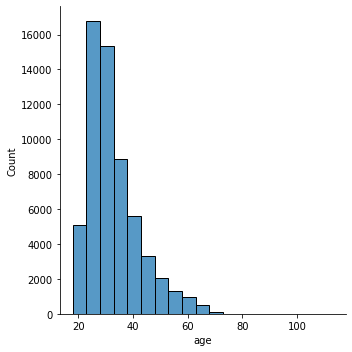

In [6]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

#### Height // Altura

The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

//

El siguiente gráfico muestra la variable altura, la mayría de la gente parece estar entre 5 pie y 6.5 pie de altura.

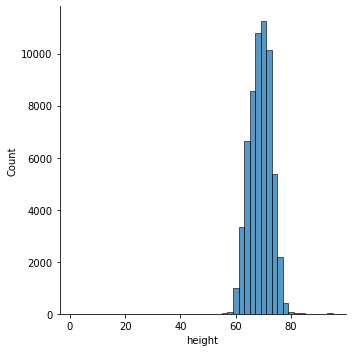

In [7]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);

#### Income // Ingresos

Here is the data of income, it seems that the majority of the participants do not include their income figures and leave the option by default

//

Aquí están los datos de los ingresos, parece que la mayoría de los usuarion no los incluye en su perfil y deja la opción por defecto.

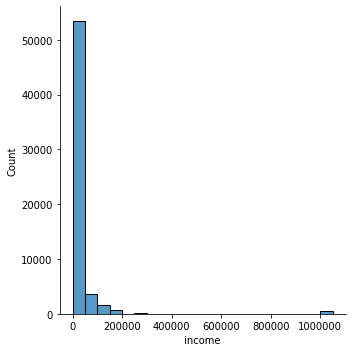

In [8]:
sns.displot(data=profiles, x="income", kind="hist", binwidth = 50000, multiple = "stack");

### Discrete Variables // Variable Discretas

#### Sex // Sexo

There are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

//

Hay más hombres en los datos, y parece que hay aproximadamente 35000 hombres y 25000 mujeres.

m    35829
f    24117
Name: sex, dtype: int64


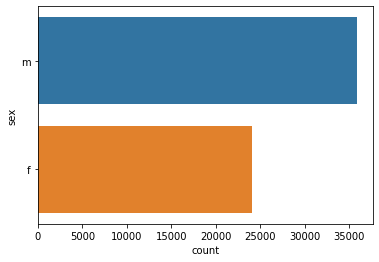

In [9]:
print(profiles.sex.value_counts())
sns.countplot(data=profiles, y="sex");

#### Body Type // Tipo de cuerpo

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

//

El siguiente gráfico muestra los tipos de cuerpo de los usuarios, parece que la mayoría de ellos se describe como promedio, fit o atlético.

Número de categorias de cuerpo: 12
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


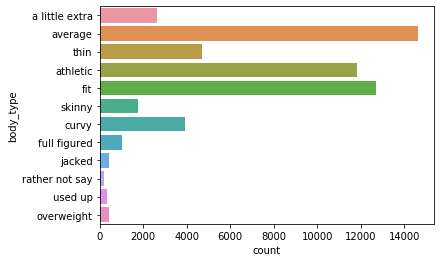

In [10]:
print("Número de categorias de cuerpo:",profiles.body_type.nunique())
print(profiles.body_type.value_counts())
sns.countplot(data=profiles, y="body_type");

#### Diet // Dieta

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

Está el gráfico de la información dietética de los usuarios. La mayoría de los usuarios comen "mayormente cualquier cosa". seguido por "cualquier cosa", y "estrictamente cualquier cosa", ser mente abierta parece ser una señal para parejas potenciales.

Número de categorias de dietas: 18
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64


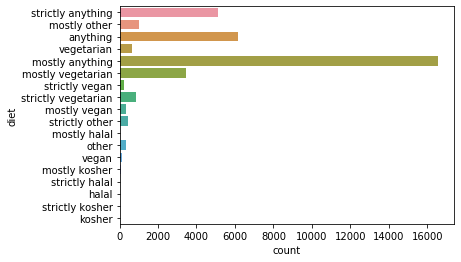

In [11]:
print("Número de categorias de dietas:",profiles.diet.nunique())
print(profiles.diet.value_counts())
sns.countplot(data=profiles, y="diet");

#### Drinks // Bebidas

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

//

El siguiente gráfico muestra que la mayoría de usuarion consumen alcohol "socialmente", luego "extrañamente" y "seguido".

Número de categorias de bebidas: 6
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


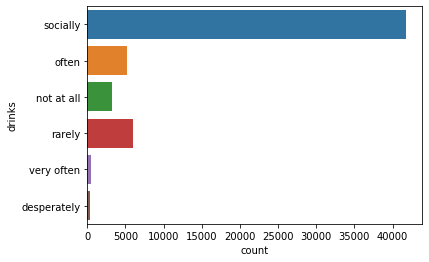

In [12]:
print("Número de categorias de bebidas:",profiles.drinks.nunique())
print(profiles.drinks.value_counts())
sns.countplot(data=profiles, y="drinks");

#### Drugs // Drogas

The vast majority of users "never" use drugs. 

//

La gran mayoría de usuarios "nunca" usan drogas.

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64


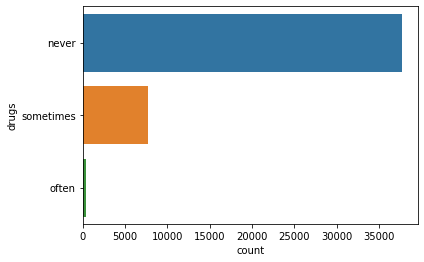

In [13]:
print(profiles.drugs.value_counts())
sns.countplot(data=profiles, y="drugs");

#### Education // Educación

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

//

Abajo puede ver que la mayoría de usuarios son graduados de la universidad, seguido por los graduados de programas de master y los que estan estudiando en la universidad. De manera curiosa, el campamento espacial es una opción popular.

Número de categorias de nivel educativo: 32
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped ou

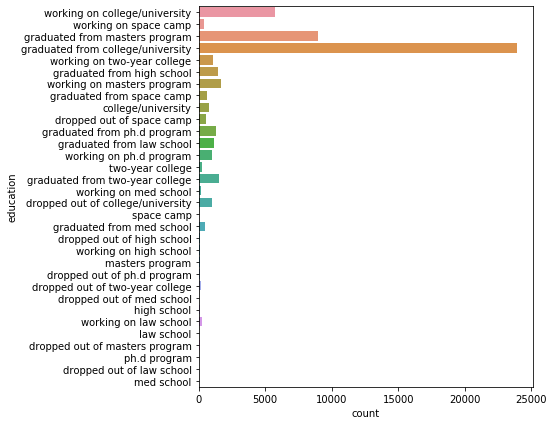

In [14]:
print("Número de categorias de nivel educativo:",profiles.education.nunique())
print(profiles.education.value_counts())
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="education");

#### Jobs // Trabajos

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

//

La mayoría de usuarios no pertenecen a las categorías propuestas, pero hay muchos estudiantes, artistas, informáticos y financieros.

Número de categorias de trabajos: 21
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64


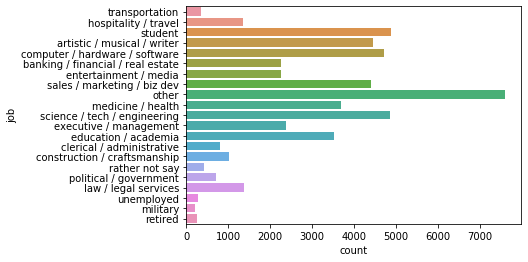

In [15]:
print("Número de categorias de trabajos:",profiles.job.nunique())
print(profiles.job.value_counts())
sns.countplot(data=profiles, y="job");

#### Orientation // Orientación Sexual

The majority of users are straight. // La mayoría de usuarios se define como heterosexual.

Número de categorias de orientación sexual: 3
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64


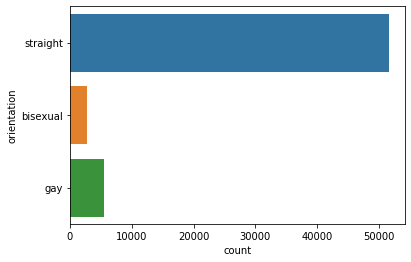

In [16]:
print("Número de categorias de orientación sexual:",profiles.orientation.nunique())
print(profiles.orientation.value_counts())
sns.countplot(data=profiles, y="orientation");

#### Smoking // Fumar

Similarly for drugs the majority of users chose "no" for smoking. // Similar  a la categoría de drogas, la mayoría de usuarios dicen "no" fumar.

Número de categorias fumador: 5
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64


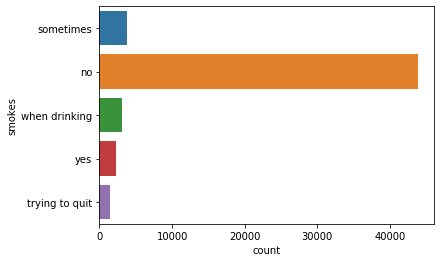

In [17]:
print("Número de categorias fumador:",profiles.smokes.nunique())
print(profiles.smokes.value_counts())
sns.countplot(data=profiles, y="smokes");

#### Signs // Signos Zodiacales

Here are the astrological signs of the users. It is organized on the basis of how much importance for the user is astrology. It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. We will leave the 12 signs of the zodiac without qualifiers.

//

Están los signos zodiacales de los usuarios. Está organizado en base a que tanta importancia le dan a la astrología. Es importante que limpiemos las etiquetas ya que esto es lo que se predice y 48 predicciones serían bastante difíciles. Dejaremos los 12 signos del zodiaco sin calificadores.

In [18]:
print("Número de categorias signos zodiacales:",profiles.sign.nunique())
print(profiles.sign.value_counts())

Número de categorias signos zodiacales: 48
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
aquarius but it doesn&rsquo;t matter             1408
libra but it doesn&rsquo;t matter      

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


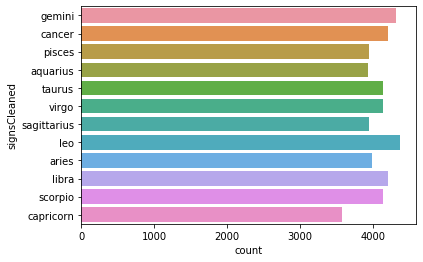

In [19]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0) #Cleaned
print("nnumber of categories:",profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())
sns.countplot(data=profiles, y="signsCleaned");

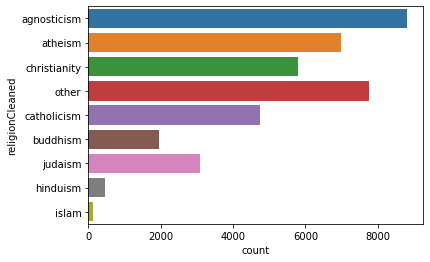

In [20]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

### Data Preparation // Preparación de Datos

#### Missing Data // Datos Faltantes

We have to check if we need to be imputed or removed data. It seems that many of the columns do have missing values. 

//

Tenemos que verificar si necesitamos ingresar o eliminar datos. Parece que muchas de las columnas tienen valores faltantes.

In [21]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Preprocessing // Preprocesamiento

Preparing the data for modeling is important since it can speed up the process and produce better models. We want to make sure the data we are inputing into our modelling step is good enough to share them.

//

Preparar los datos para el modelado es importante para hacer el más rápido el procesamiento y producir mejores modelo. Queremos asegurarnos de que los datos que ingresamos en nuestro paso de modelado sean lo suficientemente buenos para compartirlos.

##### Problem 1 (Genre) // Problema 1 (Género)

In [56]:
cols1 = ['diet', 'body_type', 'drinks', 'drugs', 'smokes', 'sex', 'height', 'age']
df1 = profiles[cols1].dropna()
for col in cols1[:-3]:
    df1 = pd.get_dummies(df1, columns=[col], prefix = [col])
df1.sex.value_counts()

m    15140
f    10062
Name: sex, dtype: int64

In [59]:
col_length1 = len(df1.columns)

X1 = df1.iloc[:, 1:col_length1]
Y1 = df1.iloc[:, 0:1]

val_size = 0.25
 
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X1, Y1, test_size=val_size, random_state = 0)

Y_train1 = Y_train1.to_numpy().ravel()
Y_val1 = Y_val1.to_numpy().ravel()


##### Problem 2 (Job) // Problema 2 (Trabajo)

In [60]:
cols2 = ['education', 'sex', 'orientation', 'job' , 'age']
df2 = profiles[cols2].dropna()
for col in cols2[:-2]:
    df2 = pd.get_dummies(df2, columns=[col], prefix = [col])
df2.job.value_counts()

other                                6864
student                              4703
science / tech / engineering         4643
computer / hardware / software       4380
artistic / musical / writer          4104
sales / marketing / biz dev          4091
education / academia                 3431
medicine / health                    3407
executive / management               2203
banking / financial / real estate    2110
entertainment / media                2096
law / legal services                 1320
hospitality / travel                 1198
construction / craftsmanship          860
clerical / administrative             721
political / government                684
rather not say                        393
transportation                        305
unemployed                            250
retired                               229
military                              183
Name: job, dtype: int64

In [62]:
col_length2 = len(df2.columns)

X2 = df2.iloc[:, 1:col_length2]
Y2 = df2.iloc[:, 0:1]
 
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X2, Y2, test_size=val_size, random_state = 0)

Y_train2 = Y_train2.to_numpy().ravel()
Y_val2 = Y_val2.to_numpy().ravel()

We have an imbalanced dataset, there is a highly unequal distribution of classes in the target column. So we have to balance it using over sample. // Tenemos un conjunto de datos desbalanceado, hay una distribución muy desigual entre las clases de la columna objetivo. Así que tenemos que balancearlo utilizando sobre muestreo.

In [63]:
sm = SMOTE(random_state = 2) 
X_trainr, Y_trainr = sm.fit_sample(X_train2, Y_train2.ravel()) 

##### Problem 3 (Zodiacal Sing) // Problema 3 (Signo Zodiacal)

In [27]:
cols3 = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df3 = profiles[cols3].dropna()
for col in cols3[:-1]:
    df3 = pd.get_dummies(df3, columns=[col], prefix = [col])
df3.signsCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

In [28]:
col_length3 = len(df3.columns)

X3 = df3.iloc[:, 1:col_length3]
Y3 = df3.iloc[:, 0:1]
 
X_train3, X_val3, Y_train3, Y_val3 = train_test_split(X3, Y3, test_size=val_size, random_state = 0)

Y_train3 = Y_train3.to_numpy().ravel()
Y_val3 = Y_val3.to_numpy().ravel()

### Prediction // Predicción

#### Model Building // Construcción del Modelo

For this project three common algorithms will be used to make predictions. Below, the respective modules for Logistic Regression, Decision Trees and KNN. // Para este proyecto serán usados tres algorítmos comunes. Abajo, los respectivos módulos para Regresión Logística, Árboles de Desición y KNN.

### Problem 1 (Genre) // Problema 1 (Género)

###### Logistic Regresion // Regresión Logística


In [72]:
lr_model1 = LogisticRegression().fit(X_train1, Y_train1)
lr_predictions1 = lr_model1.predict(X_train1)
print(classification_report(Y_train1, lr_predictions1)) 

              precision    recall  f1-score   support

           f       0.86      0.71      0.78      7501
           m       0.83      0.92      0.88     11400

    accuracy                           0.84     18901
   macro avg       0.85      0.82      0.83     18901
weighted avg       0.84      0.84      0.84     18901



The final accuracy of the logistic regression model is 84% which is a good precision. // La exactitud del modelo de regresión logística es de 84% lo cual es un buen aproximado.

###### KNN

In [65]:
knn_model1 = KNeighborsClassifier(n_neighbors = 3).fit(X_train1, Y_train1) 
knn_predictions1 = knn_model1.predict(X_train1) 
print(classification_report(Y_train1, knn_predictions1))

              precision    recall  f1-score   support

           f       0.88      0.85      0.86      7501
           m       0.90      0.92      0.91     11400

    accuracy                           0.89     18901
   macro avg       0.89      0.89      0.89     18901
weighted avg       0.89      0.89      0.89     18901



The final accuracy of the KNN model is 89% which is a good, better than logistic regression model. // La exactitud del modelo de regresión logística es de 89% lo cual es una bueno, mejor que el modelo de la regresión logística.

###### Decision Tree // Arbol de Decisión

In [66]:
dt_model1 = DecisionTreeClassifier().fit(X_train1, Y_train1) 
dt_predictions1 = dt_model1.predict(X_train1) 
print(classification_report(Y_train1, dt_predictions1)) 
dt_model1.get_depth() 

              precision    recall  f1-score   support

           f       0.93      0.96      0.95      7501
           m       0.97      0.96      0.96     11400

    accuracy                           0.96     18901
   macro avg       0.95      0.96      0.96     18901
weighted avg       0.96      0.96      0.96     18901



36

The decision tree model is much better than previous models (96% accuracy), but due to its depth it is suspected that it is over-fitting. It will be tested with a model that has a shallower depth. // El modelo del árbol de decisión es mucho mejor que los modelos anteriores (96% de precisión), pero debido a su profundidad se sospecha que esta sobre ajustado. Se probará con un modelo que tenga una profundidad menor.

In [67]:
cart_model201 = DecisionTreeClassifier(max_depth = 20).fit(X_train1, Y_train1) 
cart_predictions201 = cart_model201.predict(X_train1)
print(classification_report(Y_train1, cart_predictions201))

              precision    recall  f1-score   support

           f       0.93      0.89      0.91      7501
           m       0.93      0.95      0.94     11400

    accuracy                           0.93     18901
   macro avg       0.93      0.92      0.93     18901
weighted avg       0.93      0.93      0.93     18901



This latest model has an accuracy of 93% which is quite good and its depth is adequate, so there is no risk of over adjustment. More statistical tests will be done to see if it is a good model. // Este último modelo tiene una precisión de 93% lo cual es bastante bueno y su profundidad es adecuada, por lo que no hay riesgo de sobre ajuste. Se le harán más pruebas estadísticas para ver si es un buen modelo.

In [68]:
kfold1 = KFold(n_splits=3, shuffle=True, random_state=0)
results1 = cross_val_score(cart_model201, X_train1, Y_train1, cv=kfold1, scoring='accuracy')

print(results1)
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))

[0.81891763 0.82825397 0.81650794]
Baseline: 82.12% (0.51%)


If we check again with cross validation, the new model is averaging 83.61% which is very good. // Si volvemos a verificar con validación cruzada, el nuevo modelo tiene un promedio de 82.12%, lo cual es muy bueno.

#### Final Model // Modelo Final

So it seems that the `Decision Tree Model` might be the best model for OkCupid to use when we want predict the user's genre knowing his age, body type and habits. // Parece que el `Modelo de Árbol de Decisión` puede ser el mejor modelo para usarlo en OkCupid cuando queramos predecir el género del usuario basado en su edad, tipo de cuerpo y hábitos.

In [69]:
rt_predictionsVal = cart_model201.predict(X_val1) 
print(classification_report(Y_val1, rt_predictionsVal))

              precision    recall  f1-score   support

           f       0.79      0.77      0.78      2561
           m       0.84      0.86      0.85      3740

    accuracy                           0.82      6301
   macro avg       0.82      0.81      0.81      6301
weighted avg       0.82      0.82      0.82      6301



By using the hold out or validation set, we get 82% accuracy which is very good. // Usando el set de validación, tenemos un 82% de precision lo cual es muy bueno.

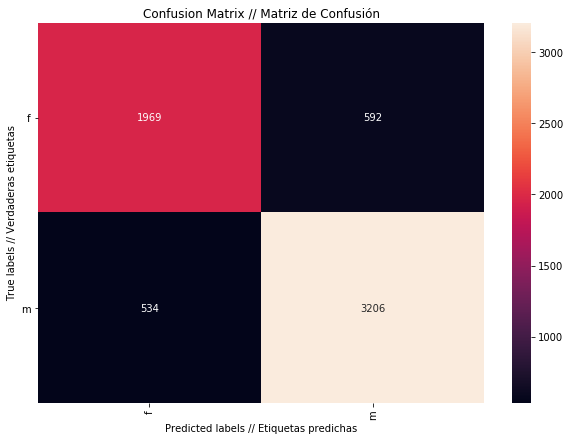

In [70]:
final_cm1 = confusion_matrix(Y_val1, rt_predictionsVal)
dt_labels1 = cart_model201.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm1, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels // Etiquetas predichas');
ax.set_ylabel('True labels // Verdaderas etiquetas'); 
ax.set_title('Confusion Matrix // Matriz de Confusión');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dt_labels1); 
ax.yaxis.set_ticklabels(dt_labels1);

We can clearly see from the confusion matrix that in most cases the predicted labels are the ones that correspond to the real labels. // Podemos observar claramente en la matriz de confusión que en la mayoría de los casos las etiquetas predichas son las que corresponden con las etiquetas reales.

### Problem 2 (Job) // Problema 2 (Trabajo)

###### Logistic Regresion // Regresión Logística

In [71]:
lr_model2 = LogisticRegression(multi_class="multinomial").fit(X_trainr, Y_trainr) 
lr_predictions2 = lr_model2.predict(X_trainr) 
print(classification_report(Y_trainr, lr_predictions2)) 

                                   precision    recall  f1-score   support

      artistic / musical / writer       0.14      0.05      0.07      5126
banking / financial / real estate       0.00      0.00      0.00      5126
        clerical / administrative       0.12      0.44      0.19      5126
   computer / hardware / software       0.11      0.44      0.17      5126
     construction / craftsmanship       0.29      0.14      0.18      5126
             education / academia       0.20      0.24      0.22      5126
            entertainment / media       0.05      0.00      0.01      5126
           executive / management       0.17      0.14      0.15      5126
             hospitality / travel       0.17      0.06      0.08      5126
             law / legal services       0.91      0.57      0.70      5126
                medicine / health       0.64      0.12      0.21      5126
                         military       0.25      0.68      0.37      5126
                        

The final accuracy of the logistic regression model is 22% which is a very small precision. // La exactitud del modelo de regresión logística es de 2% lo cual es una muy baja precisión.

##### KNN

In [74]:
knn_model2 = KNeighborsClassifier(n_neighbors = 5).fit(X_trainr, Y_trainr)
knn_predictions2 = knn_model2.predict(X_trainr)
print(classification_report(Y_trainr, knn_predictions2)) 

                                   precision    recall  f1-score   support

      artistic / musical / writer       0.12      0.23      0.16      5126
banking / financial / real estate       0.11      0.12      0.11      5126
        clerical / administrative       0.17      0.36      0.23      5126
   computer / hardware / software       0.14      0.19      0.16      5126
     construction / craftsmanship       0.23      0.37      0.28      5126
             education / academia       0.22      0.15      0.18      5126
            entertainment / media       0.12      0.13      0.13      5126
           executive / management       0.16      0.16      0.16      5126
             hospitality / travel       0.25      0.19      0.22      5126
             law / legal services       0.70      0.62      0.66      5126
                medicine / health       0.45      0.21      0.29      5126
                         military       0.46      0.55      0.50      5126
                        

In [75]:
kfold2 = KFold(n_splits=5, shuffle=True, random_state=0)
results2 = cross_val_score(knn_model2, X_trainr, Y_trainr, cv=kfold2, scoring='accuracy')

print(results2)
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

[0.25448212 0.25909239 0.2560732  0.24980259 0.25658414]
Baseline: 25.52% (0.31%)


This model is better, its final accuracy is 28% but it has a high computacional cost. // Este modelo es mejor, su precisión final es de 28% pero tiene un gran costo computacional.

##### Decision Tree // Árbol de Clasificación

In [77]:
dt_model2 = DecisionTreeClassifier().fit(X_trainr, Y_trainr) 
dt_predictions2 = dt_model2.predict(X_trainr) 
print(classification_report(Y_trainr, dt_predictions2)) 
dt_model1.get_depth() 

                                   precision    recall  f1-score   support

      artistic / musical / writer       0.38      0.16      0.22      5126
banking / financial / real estate       0.19      0.10      0.13      5126
        clerical / administrative       0.25      0.49      0.33      5126
   computer / hardware / software       0.15      0.31      0.20      5126
     construction / craftsmanship       0.36      0.37      0.37      5126
             education / academia       0.30      0.25      0.27      5126
            entertainment / media       0.28      0.07      0.12      5126
           executive / management       0.24      0.27      0.25      5126
             hospitality / travel       0.31      0.23      0.27      5126
             law / legal services       0.87      0.62      0.73      5126
                medicine / health       0.51      0.26      0.35      5126
                         military       0.43      0.68      0.53      5126
                        

36

We have a Decision Tree model with a better accuracy. // Tenemos un modelo de Árbol de decisión con una mejor precisión.

In [82]:
kfold21 = KFold(n_splits=5, shuffle=True, random_state=0)
results20 = cross_val_score(dt_model2, X_trainr, Y_trainr, cv=kfold21, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results20.std()*100))

[0.32011147 0.3153421  0.31037206 0.31678201 0.3149705 ]
Baseline: 31.55% (0.31%)


This last decision tree model is the best of the models, it has not good performance though. // Este último modelo es el mejor de los modelos, aunque no tiene un buen desempeño.

#### Final Model // Modelo Final

So it seems that the `Decision Tree Model` with depth 30 might be the best model to use when we want predict the user's job knowing his age, education, sex and sexual orientation. // Parece que el `Modelo de Árbol de Decisión` con 30 de profundidad puede ser el mejor modelo para usarlo cuando queramos predecir el trabajo del usuario conociendo su edad, educación, género y orientación sexual.

In [83]:
rt_predictionsVal2 = cart_model202.predict(X_val2) 
print(classification_report(Y_val2, rt_predictionsVal2))

                                   precision    recall  f1-score   support

      artistic / musical / writer       0.09      0.03      0.05      1018
banking / financial / real estate       0.06      0.04      0.05       553
        clerical / administrative       0.04      0.27      0.07       178
   computer / hardware / software       0.18      0.25      0.21      1079
     construction / craftsmanship       0.08      0.15      0.10       239
             education / academia       0.22      0.18      0.19       883
            entertainment / media       0.04      0.02      0.02       513
           executive / management       0.13      0.19      0.16       572
             hospitality / travel       0.04      0.07      0.05       309
             law / legal services       0.66      0.56      0.61       320
                medicine / health       0.31      0.17      0.22       819
                         military       0.03      0.22      0.05        49
                        

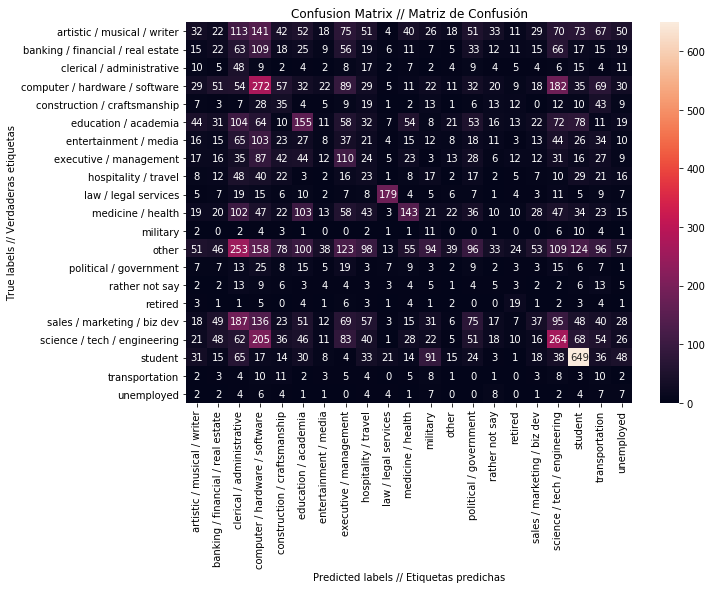

In [84]:
final_cm2 = confusion_matrix(Y_val2, rt_predictionsVal2)
rt_labels2 = cart_model202.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm2, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels // Etiquetas predichas');
ax.set_ylabel('True labels // Verdaderas etiquetas'); 
ax.set_title('Confusion Matrix // Matriz de Confusión');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(rt_labels2); 
ax.yaxis.set_ticklabels(rt_labels2);

In the confusion matrix, it becomes clear that computer job was predicted most often and student was predicted more precisely, but this model definitely is not a good model for this. Other information is needed to predict the current job of the OkCupid user. 

// 

En la matriz de confusión, queda claro que el trabajo de computaciín se predijo con mayor frecuencia y el de estudiante se predijo con mayor precisión, pero este modelo definitivamente no es un buen modelo para esto. Se necesita otro tipo de información para predecir el trabajo actual del usuario de OkCupid.

### Problem 3 (Sign) // Problema 3 (Signo Zodiacal)

###### Logistic Regresion // Regresión Logística

In [46]:
lr_model3 = LogisticRegression(multi_class="multinomial").fit(X_train3, Y_train3) 
lr_predictions3 = lr_model3.predict(X_train3) 
print(classification_report(Y_train3, lr_predictions3)) 

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



The final accuracy of the logistic regression model is 12% which is a very poor precision. // La exactitud del modelo de regresión logística es de 12% lo cual es una precisión muy pobre.

##### KNN

In [47]:
knn_model3 = KNeighborsClassifier(n_neighbors = 5).fit(X_train3, Y_train3)
knn_predictions3 = knn_model3.predict(X_train3)
print(classification_report(Y_train3, knn_predictions3)) 

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



In [48]:
kfold21 = KFold(n_splits=5, shuffle=True, random_state=0)
results2031 = cross_val_score(knn_model3, X_trainr, Y_trainr, cv=kfold21, scoring='accuracy')

print(results2031)
print("Baseline: %.2f%% (%.2f%%)" % (results2031.mean()*100, results2031.std()*100))

[0.21504877 0.20957778 0.20990292 0.20702309 0.21032096]
Baseline: 21.04% (0.26%)


This model had a 33% accuracy which is a good sign. // Este modelo tuvo 33% de precisión, lo que es buena señal.


##### Decision Tree // Árbol de Clasificación

In [49]:
dt_model3 = DecisionTreeClassifier().fit(X_train3, Y_train3) 
dt_predictions3 = dt_model3.predict(X_train3) 
print(classification_report(Y_train3, dt_predictions3)) 
dt_model1.get_depth() 

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



81

The results of this model are very promising because it has a 78% accuracy but it's probably overfitten. // Los resultados de este modelo son muy prometedores porque tiene 78% de precisión pero probablemente está sobreajustado.

In [50]:
cart_model203 = DecisionTreeClassifier(max_depth = 30).fit(X_train3, Y_train3) 
cart_predictions203 = cart_model203.predict(X_train3)
print(classification_report(Y_train3, cart_predictions203))

              precision    recall  f1-score   support

    aquarius       0.58      0.80      0.68       968
       aries       0.58      0.74      0.65       983
      cancer       0.66      0.72      0.68      1129
   capricorn       0.68      0.71      0.70       882
      gemini       0.67      0.66      0.66      1130
         leo       0.61      0.72      0.66      1121
       libra       0.56      0.67      0.61      1028
      pisces       0.72      0.60      0.65       997
 sagittarius       0.83      0.60      0.70       965
     scorpio       0.75      0.59      0.66      1001
      taurus       0.75      0.63      0.69      1045
       virgo       0.81      0.55      0.65      1090

    accuracy                           0.66     12339
   macro avg       0.68      0.67      0.67     12339
weighted avg       0.68      0.66      0.67     12339



The new accuracy rate of ~67% is worse than the first iteration, but slightly better than the KNN model.// La nueva exactitud es de 67% aproximadamente, es peor que la primera iteración pero significativamente mejor que el modelo de KNN.

In [51]:
kfold2 = KFold(n_splits=5, shuffle=True, random_state=0)
results203 = cross_val_score(cart_model203, X_train3, Y_train3, cv=kfold2, scoring='accuracy')

print(results203)
print("Baseline: %.2f%% (%.2f%%)" % (results203.mean()*100, results203.std()*100))

[0.0834684  0.09846029 0.08833063 0.09602917 0.09241994]
Baseline: 9.17% (0.54%)


If we check again with cross validation, the new model is still averaging 9% which is not very good. // Si volvemos a verificar con validación cruzada, el nuevo modelo tiene un promedio de 9%, lo cual no es muy bueno.

#### Final Model // Modelo Final

So it seems that the `knn_model` might be the best model for OkCupid to use when users don't have their signs listed on their user profile.

In [52]:
knn_predictionsVal3 = knn_model3.predict(X_val3) 
print(classification_report(Y_val3, knn_predictionsVal3))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



By using validation set, we get ~9% accuracy which is not very good. // Al usar el conjunto de validación, obtenemos una precisión de ~ 9%, lo que no es muy bueno.

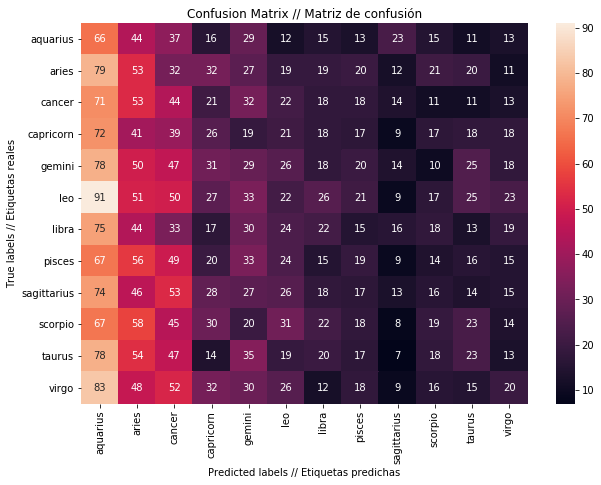

In [53]:
final_cm3 = confusion_matrix(Y_val3, knn_predictionsVal3)
knn_labels3 = knn_model3.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm3, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels // Etiquetas predichas');
ax.set_ylabel('True labels // Etiquetas reales'); 
ax.set_title('Confusion Matrix // Matriz de confusión');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels3); 
ax.yaxis.set_ticklabels(knn_labels3);

In the confusion matrix, it is clear that Cancer, Gemini, Leo and Virgo were most frequently predicted, but it was not very accurate, as the vertical color band represents even mostly incorrect and some correct distributed guesses. 

// 

En la matriz de confusión, queda claro que Cáncer, Géminis, Leo y Virgo se predijeron con mayor frecuencia, pero no fue muy preciso, ya que la banda de color vertical representa incluso conjeturas distribuidas en su mayoría incorrectas y algunas correctas.

### Conclusion // Conclusión


#### General Comments // Comentarios Generales

In this project, Machine Learning was used to predict the current job and the zodiac sign of OkCupid users and to find a pattern of the habits of the users of the platform according to their gender.

Knowing the current job of an OkCupid user is important to complete the profile information on the website and the prediction of the zodiac sign could be a compatibility tool since many people believe in astrology and coincidences between compatible signs. If users don't enter this data, an algorithmic solution could generate the missing data when matching. Unfortunately, the final algorithm selected did nothing better than a basic guess for both cases.

Establishing a pattern between the age and the habits of users by gender could be useful for a study of social sciences, to make this prediction it was found that the decision tree model is the most appropriate and can be correct in 85% of the cases.

//

En este proyecto, el Machine Learning se utilizó para predecir el trabajo actual y el signo zodiacal de los usuarios de OkCupid y para encontrar un patrón los hábitos de los usuarios de la plataforma según su género. 

Saber el trabajo actual de un usuario de OkCupid es importante para completar el la información del perfil de la página web y la predicción del signo zodiacal podría ser una herramienta de compatibilidad ya que muchas personas creen en la astrología y en las coincidencias entre signos compatibles. Si los usuarios no ingresan estos datos, una solución algorítmica podría generar los datos faltantes al hacer coincidencias. Por desgracia, el algoritmo final seleccionado no hizo nada mejor que una conjetura básica para ambos casos.

Establecer un patrón entre la edad y los hábitos de los usuarios por género podría ser útil para un estudio de ciencias sociales, para realizar esta predicción se encontró que el modelo de árbol de decisión es el más adecuado y puede acertar en el 85% de los casos.

#### Next Steps // Próximos Pasos

Next steps will be to seriously consider whether it is possible to predict user's astrological signs and their job, or if there is a way to do with more data. Another possibility is to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms. 

//

Los siguientes pasos serán considerar seriamente si es posible predecir el signo zodiacal y el trabajo del usuario o si hay una manera de hacerlo con más datos. Otra posibilidad es agregar modelos adicionales o ajustar los hiperparámetros de los modelos usados para ver si se podría extraer más poder predictivo de los algoritmos.